### MVP Summary

This MVP is my baseline model for predicting Tripadvisor hotel ratings for featured destinations in Australia. 

Almost 75% of the Featured Price (price/night) data were missing, so I compared whether a baseline model with missing prices imputed using linear regression (using rating and review number data) would perform better than a model with missing prices imputed with the median price.

The features I included for the baseline models were: price per night ('Featured Price'), the hotel class ('Hotel Star Class'), and the number of reviews ('Number of Reviews'). 

OLS using LR-imputed price
Train:  0.098
Val:  0.151

OLS using median-imputed price
Train:  0.016
Val:  0.029


Although the R^2 values for both models were low, the model with the price imputed using linear regression performed slightly better, so I would iterate on this model. 

Future steps include using feature engineering to allow the categorical variables to be considered as features, as well as resolving missing values for the other numerical data.


In [105]:
import pandas as pd

In [106]:
import pickle
df = pd.read_pickle('cleaned_df')

In [107]:
df.shape

(1309, 22)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 2756
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1309 non-null   object 
 1   Featured Price         1309 non-null   object 
 2   Category               1309 non-null   object 
 3   Page Name              1309 non-null   object 
 4   Tripadvisor Rating     1309 non-null   float64
 5   Address                1309 non-null   object 
 6   Property Amenities     1309 non-null   object 
 7   Room Features          1309 non-null   object 
 8   Room Types             1309 non-null   object 
 9   Hotel Style            1309 non-null   object 
 10  Languages              1309 non-null   object 
 11  Hotel Star Class       1309 non-null   object 
 12  Car/Walkability        1309 non-null   object 
 13  Restaurants Proximity  1309 non-null   object 
 14  Attractions Proximity  1309 non-null   object 
 15  Numb

In [109]:
smaller_df = df.loc[:,['Featured Price','Tripadvisor Rating', 'Number of Reviews']]

#### Model 1 - Impute price by linear regression

In [110]:
test_data = smaller_df[smaller_df['Featured Price'] == 'empty']

In [111]:
test_data #n=918

,Featured Price,Tripadvisor Rating,Number of Reviews
51,empty,5.0,182
53,empty,5.0,156
55,empty,5.0,250
57,empty,5.0,634
59,empty,5.0,242
...,...,...,...
2740,empty,3.0,6
2741,empty,2.5,4
2742,empty,1.5,7
2753,empty,3.5,39


In [112]:
train_data = smaller_df[smaller_df['Featured Price'] != 'empty']

In [113]:
train_data #n=391

,Featured Price,Tripadvisor Rating,Number of Reviews
0,84.0,4.5,373
2,123.0,4.5,541
4,106.0,4.5,369
6,183.0,4.5,275
7,173.0,5.0,345
...,...,...,...
2636,150.0,3.5,1261
2639,100.0,4.5,98
2658,124.0,4.0,5
2659,196.0,5.0,1


In [114]:
train_data['Featured Price'] = train_data['Featured Price'].apply(lambda x: float(x))

/var/folders/__/04d0437x46368yx2gw6qf2km0000gn/T/ipykernel_2768/2557754362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Featured Price'] = train_data['Featured Price'].apply(lambda x: float(x))


In [115]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 2665
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Featured Price      391 non-null    float64
 1   Tripadvisor Rating  391 non-null    float64
 2   Number of Reviews   391 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 12.2 KB


In [116]:
y_train = train_data['Featured Price']

In [117]:
y_train.shape

(391,)

In [118]:
X_train = train_data.drop('Featured Price', axis=1)

In [119]:
X_train.shape

(391, 2)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr = LinearRegression()

In [122]:
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
X_test = test_data.drop('Featured Price', axis=1)

In [124]:
y_pred = lr.predict(X_test)

In [125]:
lr_impute_df = df.copy()

In [126]:
lr_impute_df.loc[lr_impute_df["Featured Price"] == 'empty', "Featured Price"] = y_pred

In [127]:
lr_impute_df.head()

,Name,Featured Price,Category,Page Name,Tripadvisor Rating,Address,Property Amenities,Room Features,Room Types,Hotel Style,...,Car/Walkability,Restaurants Proximity,Attractions Proximity,Number of Reviews,Covid Precautions,Travel Destination,Restaurants/Mile,Attractions/Mile,Zip Code,Walk Score
0,Tropicana Motor Inn,84.0,Hostel,Tropicana Motor Inn,4.5,"22-26 Osbourne Ave, Cowes, Phillip Island, Vic...","['Free parking', 'Free internet', 'Pool', 'Bre...","['Air conditioning', 'Seating area', 'Iron', '...","['Non-smoking rooms', 'Family rooms']","['Business', 'Family']",...,60Somewhat walkableGrade: 60 out of 100,22 Restaurants within 0.3 miles,3 Attractions within 0.3 miles,373,['All linens sanitized in high-temperature was...,Cowes,73.33,10.0,Victoria 3922 Australia,60
2,Kaloha Holiday Resort,123.0,Bed and Breakfast,Kaloha Holiday Resort,4.5,"Cnr Steele and Chapel Streets, Cowes, Phillip ...","['Free parking', 'Free High Speed Internet (Wi...","['Blackout curtains', 'Air conditioning', 'Hou...","['Non-smoking rooms', 'Suites', 'Family rooms']",['Mid-range'],...,60Somewhat walkableGrade: 60 out of 100,31 Restaurants within 0.3 miles,5 Attractions within 0.3 miles,541,['Hand sanitizer available to guests & staff'],Cowes,103.33,16.67,Victoria 3922 Australia,60
4,Amaroo Park,106.0,Condominium,Amaroo Park,4.5,"97 Church St, Cowes, Phillip Island, Victoria ...","['Free parking', 'Free High Speed Internet (Wi...","['Private balcony', 'Kitchenette', 'Kitchenwar...",['Non-smoking rooms'],"['Family', 'Centrally Located']",...,65Somewhat walkableGrade: 65 out of 100,33 Restaurants within 0.3 miles,5 Attractions within 0.3 miles,369,[],Cowes,110.0,16.67,Victoria 3922 Australia,65
6,The Waves Apartments,183.0,Condominium,The Waves Apartments,4.5,"No. 1 The Esplanade P.O. Box 108, Cowes, Phill...","['Free parking', 'Parking garage', 'Wifi', 'Pa...","['Air conditioning', 'Desk', 'Private balcony'...","['Ocean view', 'Non-smoking rooms', 'Suites']","['Bay View', 'Great View']",...,67Somewhat walkableGrade: 67 out of 100,40 Restaurants within 0.3 miles,4 Attractions within 0.3 miles,275,[],Cowes,133.33,13.33,Victoria 3922 Australia,67
7,Glen Isla House,173.0,Specialty Hotel,Glen Isla House,5.0,"230 Church St, Cowes, Phillip Island, Victoria...","['Free parking', 'Secured parking', 'Free High...","['Blackout curtains', 'Air conditioning', 'Fir...",['Non-smoking rooms'],"['Hidden Gem', 'Charming']",...,empty,empty,empty,345,['All linens sanitized in high-temperature was...,Cowes,empty,empty,Victoria 3922 Australia,empty


In [128]:
lr_impute_df.shape

(1309, 22)

In [129]:
lr_impute_df.to_pickle('lr_imputed_df')

#### Model 2 - Impute price by mean or median

In [130]:
no_price  = smaller_df[smaller_df['Featured Price'] == 'empty']

In [131]:
has_price = smaller_df[smaller_df['Featured Price'] != 'empty']

In [132]:
import matplotlib.pyplot as plt 

(array([146., 155.,  48.,  23.,   9.,   2.,   2.,   1.,   2.,   3.]),
 array([32.0, 107.7, 183.4, 259.1, 334.8, 410.5, 486.20000000000005, 561.9,
        637.6, 713.3000000000001, 789.0], dtype=object),
 <BarContainer object of 10 artists>)

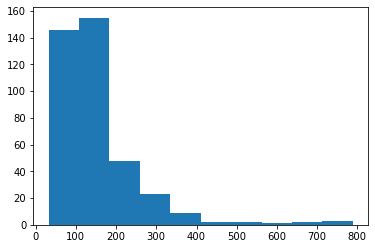

In [133]:
plt.hist(has_price['Featured Price'])
#skew to right 

In [134]:
med_price = has_price['Featured Price'].median()

In [135]:
med_impute_df = df.copy()

In [136]:
med_impute_df.loc[med_impute_df["Featured Price"] == 'empty', "Featured Price"] = med_price

In [137]:
med_impute_df.head()

,Name,Featured Price,Category,Page Name,Tripadvisor Rating,Address,Property Amenities,Room Features,Room Types,Hotel Style,...,Car/Walkability,Restaurants Proximity,Attractions Proximity,Number of Reviews,Covid Precautions,Travel Destination,Restaurants/Mile,Attractions/Mile,Zip Code,Walk Score
0,Tropicana Motor Inn,84.0,Hostel,Tropicana Motor Inn,4.5,"22-26 Osbourne Ave, Cowes, Phillip Island, Vic...","['Free parking', 'Free internet', 'Pool', 'Bre...","['Air conditioning', 'Seating area', 'Iron', '...","['Non-smoking rooms', 'Family rooms']","['Business', 'Family']",...,60Somewhat walkableGrade: 60 out of 100,22 Restaurants within 0.3 miles,3 Attractions within 0.3 miles,373,['All linens sanitized in high-temperature was...,Cowes,73.33,10.0,Victoria 3922 Australia,60
2,Kaloha Holiday Resort,123.0,Bed and Breakfast,Kaloha Holiday Resort,4.5,"Cnr Steele and Chapel Streets, Cowes, Phillip ...","['Free parking', 'Free High Speed Internet (Wi...","['Blackout curtains', 'Air conditioning', 'Hou...","['Non-smoking rooms', 'Suites', 'Family rooms']",['Mid-range'],...,60Somewhat walkableGrade: 60 out of 100,31 Restaurants within 0.3 miles,5 Attractions within 0.3 miles,541,['Hand sanitizer available to guests & staff'],Cowes,103.33,16.67,Victoria 3922 Australia,60
4,Amaroo Park,106.0,Condominium,Amaroo Park,4.5,"97 Church St, Cowes, Phillip Island, Victoria ...","['Free parking', 'Free High Speed Internet (Wi...","['Private balcony', 'Kitchenette', 'Kitchenwar...",['Non-smoking rooms'],"['Family', 'Centrally Located']",...,65Somewhat walkableGrade: 65 out of 100,33 Restaurants within 0.3 miles,5 Attractions within 0.3 miles,369,[],Cowes,110.0,16.67,Victoria 3922 Australia,65
6,The Waves Apartments,183.0,Condominium,The Waves Apartments,4.5,"No. 1 The Esplanade P.O. Box 108, Cowes, Phill...","['Free parking', 'Parking garage', 'Wifi', 'Pa...","['Air conditioning', 'Desk', 'Private balcony'...","['Ocean view', 'Non-smoking rooms', 'Suites']","['Bay View', 'Great View']",...,67Somewhat walkableGrade: 67 out of 100,40 Restaurants within 0.3 miles,4 Attractions within 0.3 miles,275,[],Cowes,133.33,13.33,Victoria 3922 Australia,67
7,Glen Isla House,173.0,Specialty Hotel,Glen Isla House,5.0,"230 Church St, Cowes, Phillip Island, Victoria...","['Free parking', 'Secured parking', 'Free High...","['Blackout curtains', 'Air conditioning', 'Fir...",['Non-smoking rooms'],"['Hidden Gem', 'Charming']",...,empty,empty,empty,345,['All linens sanitized in high-temperature was...,Cowes,empty,empty,Victoria 3922 Australia,empty


In [138]:
med_impute_df.to_pickle('med_imputed_df')

### Evaluate which method leads to better R^2

In [139]:
import seaborn as sns

In [140]:
lr_impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 2756
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1309 non-null   object 
 1   Featured Price         1309 non-null   object 
 2   Category               1309 non-null   object 
 3   Page Name              1309 non-null   object 
 4   Tripadvisor Rating     1309 non-null   float64
 5   Address                1309 non-null   object 
 6   Property Amenities     1309 non-null   object 
 7   Room Features          1309 non-null   object 
 8   Room Types             1309 non-null   object 
 9   Hotel Style            1309 non-null   object 
 10  Languages              1309 non-null   object 
 11  Hotel Star Class       1309 non-null   object 
 12  Car/Walkability        1309 non-null   object 
 13  Restaurants Proximity  1309 non-null   object 
 14  Attractions Proximity  1309 non-null   object 
 15  Numb

In [141]:
lr_impute_df = lr_impute_df[lr_impute_df['Hotel Star Class'] != 'empty']

In [142]:
lr_impute_df['Hotel Star Class'] = lr_impute_df['Hotel Star Class'].apply(lambda x: float(x))

In [143]:
lr_impute_df['Featured Price'] = lr_impute_df['Featured Price'].apply(lambda x: round(x))

In [144]:
df1 = lr_impute_df.loc[:,['Featured Price','Tripadvisor Rating', 'Number of Reviews', 'Hotel Star Class']]

In [145]:
df1

,Featured Price,Tripadvisor Rating,Number of Reviews,Hotel Star Class
0,84,4.5,373,3.5
2,123,4.5,541,3.0
4,106,4.5,369,3.0
6,183,4.5,275,3.5
7,173,5.0,345,5.0
...,...,...,...,...
2730,168,4.5,63,4.0
2735,168,4.5,2,3.5
2739,181,5.0,1,4.0
2741,119,2.5,4,4.0


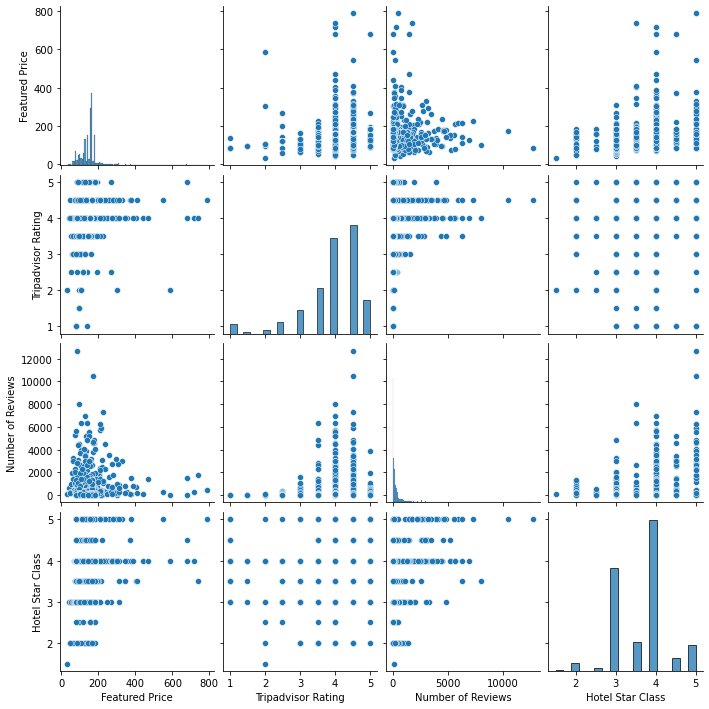

In [146]:
sns.pairplot(df1)
#this smaller df does not seem to show anything promising - need to do feature engineering w categoricals

In [147]:
import matplotlib.pyplot as plt

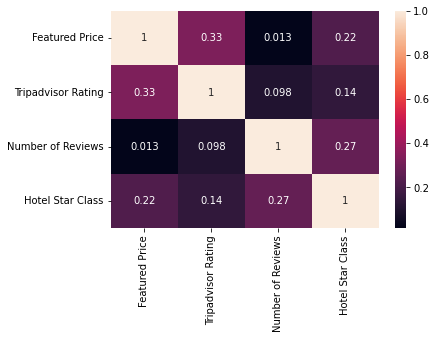

In [148]:

sns.heatmap(df1.corr(), annot=True)
plt.savefig("baseline heatmap.png", bbox_inches="tight", dpi=500)

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
import numpy as np

In [151]:
X1 = df1.drop(columns=['Tripadvisor Rating'])
y1 = df1['Tripadvisor Rating']
#y1 = np.log(df1['Tripadvisor Rating'])

# Split into 60 train/20 val/20 test
X, X_test, y, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
print('OLS using LR-imputed price')
print('Train: ', lr.score(X_train,y_train).round(3))
print('Val: ', lr.score(X_val,y_val).round(3))

OLS using LR-imputed price
Train:  0.098
Val:  0.151


In [152]:
#trying df with prices imputed with median
med_impute_df 

,Name,Featured Price,Category,Page Name,Tripadvisor Rating,Address,Property Amenities,Room Features,Room Types,Hotel Style,...,Car/Walkability,Restaurants Proximity,Attractions Proximity,Number of Reviews,Covid Precautions,Travel Destination,Restaurants/Mile,Attractions/Mile,Zip Code,Walk Score
0,Tropicana Motor Inn,84.0,Hostel,Tropicana Motor Inn,4.5,"22-26 Osbourne Ave, Cowes, Phillip Island, Vic...","['Free parking', 'Free internet', 'Pool', 'Bre...","['Air conditioning', 'Seating area', 'Iron', '...","['Non-smoking rooms', 'Family rooms']","['Business', 'Family']",...,60Somewhat walkableGrade: 60 out of 100,22 Restaurants within 0.3 miles,3 Attractions within 0.3 miles,373,['All linens sanitized in high-temperature was...,Cowes,73.33,10.0,Victoria 3922 Australia,60
2,Kaloha Holiday Resort,123.0,Bed and Breakfast,Kaloha Holiday Resort,4.5,"Cnr Steele and Chapel Streets, Cowes, Phillip ...","['Free parking', 'Free High Speed Internet (Wi...","['Blackout curtains', 'Air conditioning', 'Hou...","['Non-smoking rooms', 'Suites', 'Family rooms']",['Mid-range'],...,60Somewhat walkableGrade: 60 out of 100,31 Restaurants within 0.3 miles,5 Attractions within 0.3 miles,541,['Hand sanitizer available to guests & staff'],Cowes,103.33,16.67,Victoria 3922 Australia,60
4,Amaroo Park,106.0,Condominium,Amaroo Park,4.5,"97 Church St, Cowes, Phillip Island, Victoria ...","['Free parking', 'Free High Speed Internet (Wi...","['Private balcony', 'Kitchenette', 'Kitchenwar...",['Non-smoking rooms'],"['Family', 'Centrally Located']",...,65Somewhat walkableGrade: 65 out of 100,33 Restaurants within 0.3 miles,5 Attractions within 0.3 miles,369,[],Cowes,110.0,16.67,Victoria 3922 Australia,65
6,The Waves Apartments,183.0,Condominium,The Waves Apartments,4.5,"No. 1 The Esplanade P.O. Box 108, Cowes, Phill...","['Free parking', 'Parking garage', 'Wifi', 'Pa...","['Air conditioning', 'Desk', 'Private balcony'...","['Ocean view', 'Non-smoking rooms', 'Suites']","['Bay View', 'Great View']",...,67Somewhat walkableGrade: 67 out of 100,40 Restaurants within 0.3 miles,4 Attractions within 0.3 miles,275,[],Cowes,133.33,13.33,Victoria 3922 Australia,67
7,Glen Isla House,173.0,Specialty Hotel,Glen Isla House,5.0,"230 Church St, Cowes, Phillip Island, Victoria...","['Free parking', 'Secured parking', 'Free High...","['Blackout curtains', 'Air conditioning', 'Fir...",['Non-smoking rooms'],"['Hidden Gem', 'Charming']",...,empty,empty,empty,345,['All linens sanitized in high-temperature was...,Cowes,empty,empty,Victoria 3922 Australia,empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,Dumfries Park B&B,127.0,Bed and Breakfast,Dumfries Park B&B,3.0,"Church Street, Cowes, Phillip Island, Victoria...",empty,empty,empty,[],...,empty,empty,empty,6,[],Phillip Island,empty,empty,Victoria 3922 Australia,empty
2741,First Class Bed & Breakfast,127.0,Small Hotel,First Class Bed & Breakfast,2.5,"648 Ventnor Rd, Ventnor, Phillip Island, Victo...",['Spa'],empty,empty,[],...,empty,empty,empty,4,[],Phillip Island,empty,empty,Victoria 3922 Australia,empty
2742,Hollywood Hotel,127.0,Villa,Hollywood Hotel,1.5,"349 Church St, Cowes, Phillip Island, Victoria...","['Free parking', 'Bar / lounge', 'Children Act...",empty,empty,[],...,empty,empty,empty,7,[],Phillip Island,empty,empty,Victoria 3922 Australia,empty
2753,Cottages For Two,127.0,Limited Service Property,Cottages For Two,3.5,"226-228 Settlement Rd, Cowes, Phillip Island, ...","['Free parking', 'Free High Speed Internet (Wi...","['Soundproof rooms', 'Air conditioning', 'Safe...",['Non-smoking rooms'],[],...,54Somewhat walkableGrade: 54 out of 100,56 Restaurants within 0.75 miles,11 Attractions within 0.75 miles,39,[],Phillip Island,74.67,14.67,Victoria 3922 Australia,54


In [153]:
med_impute_df  = med_impute_df[med_impute_df['Hotel Star Class'] != 'empty']

In [154]:
med_impute_df['Hotel Star Class'] = med_impute_df['Hotel Star Class'].apply(lambda x: float(x))

/var/folders/__/04d0437x46368yx2gw6qf2km0000gn/T/ipykernel_2768/233611725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_impute_df['Hotel Star Class'] = med_impute_df['Hotel Star Class'].apply(lambda x: float(x))


In [155]:
med_impute_df['Featured Price'] = med_impute_df['Featured Price'].apply(lambda x: round(x))

/var/folders/__/04d0437x46368yx2gw6qf2km0000gn/T/ipykernel_2768/116351353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_impute_df['Featured Price'] = med_impute_df['Featured Price'].apply(lambda x: round(x))


In [156]:
df2 = med_impute_df.loc[:,['Featured Price','Tripadvisor Rating', 'Number of Reviews', 'Hotel Star Class']]

In [157]:
df2.shape

(1057, 4)

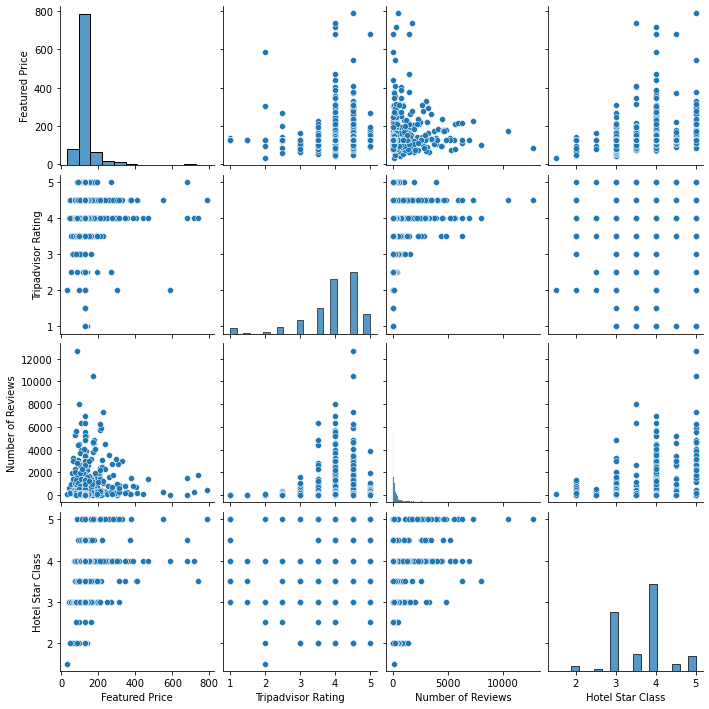

In [158]:
sns.pairplot(df2)
#the price vs. rating relationship looks very similar to the other one

<AxesSubplot:>

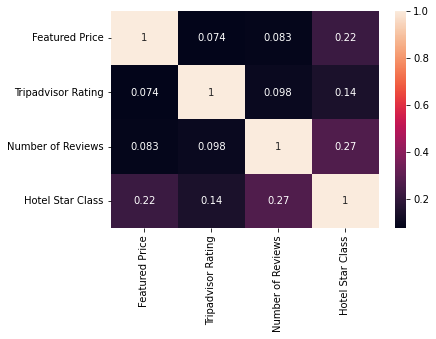

In [159]:

sns.heatmap(df2.corr(), annot=True)

In [160]:
X2 = df2.drop(columns=['Tripadvisor Rating'])
y2 = df2['Tripadvisor Rating']

# Split into 60 train/20 val/20 test
X2, X_test, y2, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
print('OLS using median-imputed price')
print('Train: ', lr.score(X_train,y_train).round(3))
print('Val: ', lr.score(X_val,y_val).round(3))

OLS using median-imputed price
Train:  0.016
Val:  0.029


(array([ 30.,   4.,  11.,  36.,   0.,  74., 144., 305., 346., 107.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

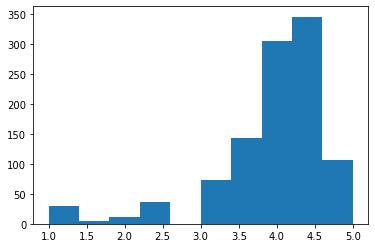

In [161]:
import matplotlib.pyplot as plt
plt.hist(lr_impute_df['Tripadvisor Rating'])

(array([ 30.,   0.,   4.,   0.,  11.,  36.,  74., 144., 305., 453.]),
 array([0.        , 0.16094379, 0.32188758, 0.48283137, 0.64377516,
        0.80471896, 0.96566275, 1.12660654, 1.28755033, 1.44849412,
        1.60943791]),
 <BarContainer object of 10 artists>)

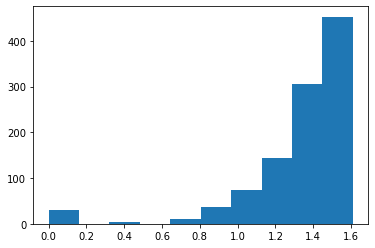

In [162]:
import scipy.stats as stats
#log transform
plt.hist(stats.boxcox(y1, lmbda=0))

In [163]:
lr_impute_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 2753
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1057 non-null   object 
 1   Featured Price         1057 non-null   int64  
 2   Category               1057 non-null   object 
 3   Page Name              1057 non-null   object 
 4   Tripadvisor Rating     1057 non-null   float64
 5   Address                1057 non-null   object 
 6   Property Amenities     1057 non-null   object 
 7   Room Features          1057 non-null   object 
 8   Room Types             1057 non-null   object 
 9   Hotel Style            1057 non-null   object 
 10  Languages              1057 non-null   object 
 11  Hotel Star Class       1057 non-null   float64
 12  Car/Walkability        1057 non-null   object 
 13  Restaurants Proximity  1057 non-null   object 
 14  Attractions Proximity  1057 non-null   object 
 15  Numb